# C Vs Python : Integer為例子
如果檢視Python3.4的原始碼(假設C語言的邏輯看python)
像是一個指向複合式C結構的指標

In [1]:
'''
strust _longobject{
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
}
'''

'\nstrust _longobject{\n    long ob_refcnt;\n    PyTypeObject *ob_type;\n    size_t ob_size;\n    long ob_digit[1];\n}\n'

一個integer包含4部分:
* ob_refcnt : 參考得計數，用來協助Python處裡記憶體的配置和解除
* ob_type : 變數型態的編碼
* ob_size : 用來指出接下來的資料成員之大小
* ob_digit : 用來儲存打算在Python變數中表示的實際整數值

Pyton 相對來說在儲存整數時多了一些額外的負擔

小節 : 
* C的整數是一個以位元組編碼的整數值在記憶體中位址的一個標籤
* Python整數是一個指標，指向記憶體中一個包含所有Python物件資訊，其中包含有放置整數值的那些位元組

總之，python跑得比C慢~~


# Python的List不僅僅是List

In [2]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
type(L[0])

int

In [4]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
type(L2),type(L2[0])

(list, str)

In [6]:
# 可以建立異質的list，會有額外的成本
L3 = [True,"2",3.0,4]
[type(item) for item in L3],type(L3)

([bool, str, float, int], list)

# Python 固定型態陣列

In [7]:
# 'i' 設定內容為整數
import array
L = list(range(10))
A = array.array('i',L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# 之後小節統一引入numpy 為 np
# 有錯誤請安裝 pip install numpy
import numpy as np

# 從 Python List 中建立陣列

In [9]:
#注意自動轉型態，明確定義型態
np.array([3.14,1,2,3],dtype='float32')

array([3.14, 1.  , 2.  , 3.  ], dtype=float32)

In [10]:
x = np.array([1,3,4])
x[0] = 3.14 # 小數點後會切掉
x

array([3, 3, 4])

In [11]:
# 不像list，numpy陣列可設定多維陣列
np.array([range(i,i+3) for i in [2,4,6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

# 從無到有建立陣列

In [12]:
print( "zeros: ",np.zeros(10,dtype=int) ) #創建0的陣列
print( "ones: ",np.ones(10,dtype=int) ) #創建1的陣列
print( "full: ",np.full((3,5),3.14) ) # 創建3.14的陣列
print( "arange: ",np.arange(2,20,2) ) # 創建2~20+2的陣列
print( "linspace: ",np.linspace(0,1,5) ) # 創建0到1之間平均分布
print( "random: ",np.random.random((3,3)) ) # 建立0~1之間3x3
print( "enormalmpty: ",np.random.normal(0,1,(3,3))) # 平均0、標準差1、內容為常態分佈3x3
print( "randint: ",np.random.randint(0,10,(3,3))) # [0,10]的整數亂數
print( "eye: ",np.eye(3)) # 單位矩陣 3x3
print( "empty: ", np.empty(3,order='C') ) # 這些值會是原本就存在那些記憶體中的值，速度比較快

zeros:  [0 0 0 0 0 0 0 0 0 0]
ones:  [1 1 1 1 1 1 1 1 1 1]
full:  [[3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]]
arange:  [ 2  4  6  8 10 12 14 16 18]
linspace:  [0.   0.25 0.5  0.75 1.  ]
random:  [[0.27804252 0.39024109 0.55830128]
 [0.11650028 0.80541766 0.64022032]
 [0.40186041 0.78101656 0.06797422]]
enormalmpty:  [[ 0.54288834  0.05011512 -0.39083047]
 [-0.44637245 -0.79491042  1.02956132]
 [-0.50304088  1.22234255 -1.43617874]]
randint:  [[1 6 1]
 [1 0 2]
 [7 8 0]]
eye:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
empty:  [1. 1. 1.]


# 陣列屬性
一維、二維、三維陣列。使用NumPy的亂數產生內容，用seed確保每一次程式碼執行時，都會產生相同亂數陣列

In [13]:
import numpy as np
np.random.seed(0) #指定種子固定亂數內容
x1 = np.random.randint(10,size=6)
x2 = np.random.randint(10,size=(3,4))
x3 = np.random.randint(10,size=(3,4,5))

print(x3)
print("x3 ndim: ", x3.ndim)
print("x3 shape: ", x3.shape)
print("x3 size: ",x3.size)
print("dtype: ", x3.dtype)
print("itemsize: ",x3.itemsize," bytes") # 列出陣列元素中的大小
print("nbytes: ",x3.nbytes, " bytes") # 列出整個陣列的大小 nbytes = itemsize * size

[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]
x3 ndim:  3
x3 shape:  (3, 4, 5)
x3 size:  60
dtype:  int32
itemsize:  4  bytes
nbytes:  240  bytes


# 陣列索引


In [14]:
x1,x2

(array([5, 0, 3, 3, 7, 9]),
 array([[3, 5, 2, 4],
        [7, 6, 8, 8],
        [1, 6, 7, 7]]))

In [15]:
x2[2,-3]

6

In [16]:
x1[0]=3.14 # 小數點後切掉
x1

array([3, 0, 3, 3, 7, 9])

# 陣列切片 : 存取子陣列
x[start:stop:step] 預設 start=0, stop=陣列大小, step=1

In [17]:
# 一維陣列
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
x[:5],x[5:],x[1:4],x[::2],x[1::2]

(array([0, 1, 2, 3, 4]),
 array([5, 6, 7, 8, 9]),
 array([1, 2, 3]),
 array([0, 2, 4, 6, 8]),
 array([1, 3, 5, 7, 9]))

## 重要!! : step是負值, start、stop的值會互換

In [19]:

# 反轉陣列
x[::-1],x[5::-2]

(array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0]), array([5, 3, 1]))

# 多維子陣列

In [20]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [21]:
x2[:2,:3]

array([[3, 5, 2],
       [7, 6, 8]])

In [22]:
x2[::-1,::-1]

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

## 重要!! : 子陣列是未複製的視圖
在做陣列切片時所傳回的子陣列是視圖，而非複製該陣列的資料，跟list不同喔!!

In [23]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [24]:
x2_sub = x2[:2,:2]
x2_sub

array([[3, 5],
       [7, 6]])

In [25]:
x2_sub[0,0] = 100
x2_sub

array([[100,   5],
       [  7,   6]])

In [26]:
# 注意這裡的[0,0]
x2 

array([[100,   5,   2,   4],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

此特性非常之重要，在未來處理大的資料集時。可透過存取部分內容而不需要複製整個資料

## 建立陣列複本(copy)
有時候也視需要從陣列中複製資料(不想改變原本的陣列)

In [27]:
x2_sub_copy = x2[:2,:2].copy()
x2_sub_copy[0,0] = 50
x2_sub_copy

array([[50,  5],
       [ 7,  6]])

In [28]:
# x2不會改變
x2

array([[100,   5,   2,   4],
       [  7,   6,   8,   8],
       [  1,   6,   7,   7]])

# 陣列的重塑(reshape)

In [29]:
gird= np.arange(1,10).reshape((3,3))
gird

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [31]:
# 一維轉二維
x.reshape((1,3)), x[np.newaxis,:]

(array([[1, 2, 3]]), array([[1, 2, 3]]))

In [32]:
x.reshape((3,1)), x[:,np.newaxis]

(array([[1],
        [2],
        [3]]),
 array([[1],
        [2],
        [3]]))

# 陣列的串接和分割(concatenate、vstack、hstack、dstack)


In [33]:
x = np.array([1,2,3])
y = np.array([3,2,1])
z = np.array([99,99,99,99])
np.concatenate([x,y,z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99, 99])

In [34]:
np.concatenate([gird,gird],axis=0),np.concatenate([gird,gird],axis=1)

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9]]))

In [35]:
#不同維度合併，vstack垂直、hstack水平、dstack第三軸
x = np.array([1,2,3])
grid = np.arange(1,7).reshape((2,3))
y = np.array([[99],[99]])
np.vstack([x,grid]),np.hstack([grid,y]),np.hstack([grid.reshape((2,3,1)),y.reshape((2,1,1))])

(array([[1, 2, 3],
        [1, 2, 3],
        [4, 5, 6]]),
 array([[ 1,  2,  3, 99],
        [ 4,  5,  6, 99]]),
 array([[[ 1],
         [ 2],
         [ 3],
         [99]],
 
        [[ 4],
         [ 5],
         [ 6],
         [99]]]))

## 分割陣列(split、hsplit、vsplit、dsplit)

In [36]:
x = [1,2,3,100,100,3,2,1]
x1,x2,x3 = np.split(x,[3, 5]) # 1、2、3 | 100、100 | 3、2、1
x1,x2,x3

(array([1, 2, 3]), array([100, 100]), array([3, 2, 1]))

In [37]:
gird = np.arange(16).reshape((4,4))
gird

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [38]:
upper, lower = np.vsplit(gird,[1]) # 垂直
left, right = np.hsplit(gird,[1]) # 水平
upper, lower,left, right

(array([[0, 1, 2, 3]]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 array([[ 0],
        [ 4],
        [ 8],
        [12]]),
 array([[ 1,  2,  3],
        [ 5,  6,  7],
        [ 9, 10, 11],
        [13, 14, 15]]))

In [39]:
gird_3d = np.arange(16).reshape((2,2,4))
x,y = np.dsplit(gird_3d,[1]) 
gird_3d,x,y,x.shape,y.shape

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],
 
        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]),
 array([[[ 0],
         [ 4]],
 
        [[ 8],
         [12]]]),
 array([[[ 1,  2,  3],
         [ 5,  6,  7]],
 
        [[ 9, 10, 11],
         [13, 14, 15]]]),
 (2, 2, 1),
 (2, 2, 3))

# Numpy : Universal Functions (Ufuncs)
Numpy計算快也可能慢，關鍵在**向量化**

In [40]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1,1000000,size=5)
%timeit compute_reciprocals(values) # 一個一個算

8.7 µs ± 86.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [41]:
%timeit (1.0 / values)

881 ns ± 8.48 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## ufunc 運算
除了算快也算比較精準的數值
| 運算子 | ufunc | 說明 |
| -------- | -------- | -------- |
| +     | np.add     | 加法     |
| -     | np.subtract     | 減法     |
| -     | np.negative     | 負號符號(ex:-2)     |
| *     | np.multiply     | 乘法     |
| /     | np.divide     | 除號     |
| //     | np.floor_divide     | 取地板除法     |
| **     | np.power     | 指數運算     |
| %     | np.mod     | 取餘數運算     |
| 無     | np.absolute、np.abs     | 絕對值     |
| 無    | np.sin、np.cos、np.tan     | 三角函數     |
| 無     | np.arcsin、np.arccos、np.arctan     | 反三角函數     |
| 無     | np.exp、np.exp2、np.power(3,x)     | e^x、2^x、3^x     |
| 無    | np.log、np.log2、np.log10     | ln(x)、log2(x)、log10(x)     |
| 無     | np.expm1、np.log1p     | exp(x) - 1、log(1+n)     |

## 特殊ufuncs : scipy.special
用計學會需要使用的函數
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html

In [43]:
from scipy import special
# Gamma 函數(一般化的階乘)以及其相關函數
x = [1,5,10]
print("gamma(x) =",special.gamma(x))
print("ln|gamma(x)| =",special.gammaln(x))
print("beta(x,2) = ",special.beta(x,2))
# 誤差函數(高斯積分)
x = np.array([0,0.3,0.7,1.0])
print("erf(x) =",special.erf(x))
print("erfc(x) =",special.erfc(x))
print("erfinv(x) =",special.erfinv(x))

gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x,2) =  [0.5        0.03333333 0.00909091]
erf(x) = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


### 設定輸出
寫進記憶體位置上

In [50]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x,10,out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [53]:
y = np.zeros(10)
np.power(2,x,out=y[::2]) # 注意個數
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


### 聚合(reduce、accumulate)、外積(outer)
* reduce : 會重複應用一個給定的運算到陣列中的每一個元素，直到剩下一個結果為止
* accumulate : 將每一個階段結果印出來
* outer : 計算兩個不同的輸入值得所有成對輸出

In [56]:
x = np.arange(1,6)
np.add.reduce(x), np.multiply.reduce(x)

(15, 120)

In [57]:
np.add.accumulate(x), np.multiply.accumulate(x)

(array([ 1,  3,  6, 10, 15], dtype=int32),
 array([  1,   2,   6,  24, 120], dtype=int32))

In [58]:
np.multiply.outer(x,x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

### Min、Max、以及兩者間的所有事

In [60]:
import numpy as np
L = np.random.random(100)
sum(L),np.sum(L)

(50.437592674129064, 50.43759267412908)

In [61]:
big_array = np.random.random(100000)
%timeit sum(L)
%timeit np.sum(L)

12.2 µs ± 381 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.6 µs ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### 注意sum不等於np.sum，兩這參數不一樣，np.sum可以自動處裡多維度陣列
np.min、np.max也一樣

### 多維度聚合

In [63]:
M = np.random.random((3,4))
print(M)

[[0.32028686 0.0589651  0.68460442 0.5117316 ]
 [0.32266518 0.59770059 0.62433439 0.87097503]
 [0.14966725 0.40081339 0.9283319  0.50417904]]


In [64]:
print(M.sum())
print(M.min(axis=0))
print(M.max(axis=1))

5.974254756521518
[0.14966725 0.0589651  0.62433439 0.50417904]
[0.68460442 0.87097503 0.9283319 ]


#### 其他聚合函式
p.s. Nan-safe補缺失值

| 函式名稱 | NaN-safe版本 | 說明 |
| -------- | -------- | -------- |
| np.sum     | np.nansum     | 計算所有元素的加總     |
| np.prod     | np.nanprod     | 計算所有元素的乘積     |
| np.mean     | np.nanmean     | 計算所有元素的平均值     |
| np.std     | np.nanstd     | 計算標準差     |
| np.var     | np.nanvar     | 計算變異量     |
| np.min     | np.nanmin     | 找出最小值     |
| np.max     | np.nanmax     | 找出最大值     |
| np.argmin     | np.nanargmin     | 找出最小值的索引    |
| np.argmax     | np.nanargmax     | 找出最大值的索引    |
| np.median     | np.nanmedian     | 所有元素的中位數    |
| np.percetile     | np.nanpercetile     | 計算元素的排名統計    |
| np.any     | N/A     | 當陣列中有任一值是True或是非零值時傳回True    |
| np.all     | N/A     | 當陣列中所有值是True或是非零值時傳回True    |

# 範例 : 美國總統的平均身高

In [69]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [70]:
heights = np.array(data['height(cm)'])
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185, 191, 182], dtype=int64)

In [72]:
print("Mean height: ",heights.mean())
print("Standard deviation: ",heights.std())
print("Minimum height: ",heights.min())
print("Maximum height: ",heights.max())
print("25th percentile: ",np.percentile(heights,25))
print("Median: ",np.median(heights))
print("75th percentile: ",np.percentile(heights,75))

Mean height:  180.04545454545453
Standard deviation:  6.983599441335736
Minimum height:  163
Maximum height:  193
25th percentile:  174.75
Median:  182.0
75th percentile:  183.5


Text(0, 0.5, 'number')

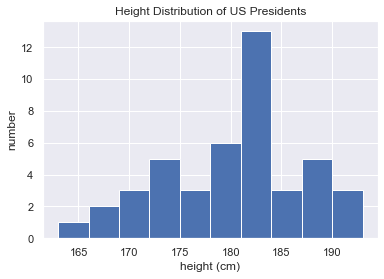

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #設定繪圖的樣式

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')